# Imports

In [1]:
import torch
from torch import nn
# from torchvision import datasets
from torch.utils.data import DataLoader, Dataset, random_split
# from torchvision import transforms
import os
import numpy as np
import pandas as pd
# from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sn

# Data prepration

In [2]:
hIn_012 = pd.read_csv('Datasets/Diabetes Health Indicators Dataset/diabetes_012_health_indicators_BRFSS2015.csv')
# hIn_binary = pd.read_csv('Datasets/Diabetes Health Indicators Dataset/diabetes_binary_health_indicators_BRFSS2015.csv')
# hIn_5050_split = pd.read_csv('Datasets/Diabetes Health Indicators Dataset/diabetes_binary_5050split_health_indicators_BRFSS2015.csv')

# hIn_5050_split
# hIn_012
hIn_binary

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


In [4]:
features_list = ['GenHlth', 'Stroke', 'HvyAlcoholConsump', 'Sex', 'CholCheck',
       'HeartDiseaseorAttack', 'HighBP', 'HighChol', 'Age', 'Veggies']

In [5]:
# hIn_5050_split[features_list].head()
hIn_binary[features_list].head()

,GenHlth,Stroke,HvyAlcoholConsump,Sex,CholCheck,HeartDiseaseorAttack,HighBP,HighChol,Age,Veggies
0,5.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,9.0,1.0
1,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0
2,5.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,9.0,0.0
3,2.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,11.0,1.0
4,2.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,11.0,1.0


In [6]:
X = hIn_binary[features_list].values
X

array([[5., 0., 0., ..., 1., 9., 1.],
       [3., 0., 0., ..., 0., 7., 0.],
       [5., 0., 0., ..., 1., 9., 0.],
       ...,
       [1., 0., 0., ..., 0., 2., 0.],
       [3., 0., 0., ..., 0., 7., 1.],
       [2., 0., 0., ..., 1., 9., 0.]])

In [7]:
Y = hIn_binary['Diabetes_binary'].values
Y

array([0., 0., 0., ..., 0., 0., 1.])

In [8]:
class CustomImageDataset(Dataset):
    def __init__(self, labels_list, features_list, transform=None):
        self.labels = labels_list
        self.features = features_list
        self.transform = transform
        self.num_data = len(features_list)

    def __len__(self):
        return self.num_data

    def __getitem__(self, idx):
        return self.features[idx], self.labels[idx]

In [9]:
dataset = CustomImageDataset(Y, X)

In [10]:
train_split_size = int(0.8 * len(X))
val_split_size = int(0.1 * len(X))
test_split_size = len(X) - (train_split_size + val_split_size) 
batch_size = 10000
num_features = len(features_list)

train_data , test_val_data = random_split(dataset, [train_split_size, val_split_size + test_split_size])
val_data , test_data = random_split(test_val_data, [val_split_size, test_split_size])

train_loader = DataLoader(train_data, batch_size, shuffle=True)
val_loader = DataLoader(val_data, batch_size, shuffle=True)
test_loader = DataLoader(test_data, batch_size, shuffle=True)

In [11]:
for data, labels in train_loader:
    print(len(data))
    break

10000


# Building Model

In [12]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cpu


In [13]:
class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Flatten(),
            nn.Linear(num_features, 128),
            nn.ReLU(),
            nn.Linear(128, 256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 16),
            nn.ReLU(),
            nn.Linear(16, 2),
            nn.Softmax(dim=1),
        )

    def forward(self, x):
        return self.layers(x)

In [14]:
model = MLP()
model.to(device)

MLP(
  (layers): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=10, out_features=128, bias=True)
    (2): ReLU()
    (3): Linear(in_features=128, out_features=256, bias=True)
    (4): ReLU()
    (5): Linear(in_features=256, out_features=128, bias=True)
    (6): ReLU()
    (7): Linear(in_features=128, out_features=64, bias=True)
    (8): ReLU()
    (9): Linear(in_features=64, out_features=16, bias=True)
    (10): ReLU()
    (11): Linear(in_features=16, out_features=2, bias=True)
    (12): Softmax(dim=1)
  )
)

In [15]:
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)
torch.optim.lr_scheduler.StepLR(optimizer, step_size=1, gamma=np.exp(np.log(0.1)/1000))
criterion = nn.CrossEntropyLoss()

# Training

In [16]:
min_valid_loss = np.inf

train_loss_list = []
eval_loss_list = []

In [17]:
epochs = 1000

for e in range(epochs):
    train_loss = 0.0
    model.train()
    for data, labels in train_loader:
        
        data = data.type(torch.float32)
        labels = labels.type(torch.long)
        
        if torch.cuda.is_available():
            data, labels = data.cuda(), labels.cuda()
         
        optimizer.zero_grad()

        target = model(data)

        loss = criterion(target,labels)

        loss.backward()

        optimizer.step()

        train_loss += loss.item()
    
    
    val_loss = 0.0
    model.eval()
    for data, labels in val_loader:
       
        data = data.type(torch.float32)
        labels = labels.type(torch.long)
        
        if torch.cuda.is_available():
            data, labels = data.cuda(), labels.cuda()
         

        target = model(data)

        loss = criterion(target,labels)

        val_loss += loss.item()
 
    print(f'Epoch {e+1} \t\t Training Loss: {train_loss / len(train_loader)} \t\t Validation Loss: {val_loss / len(val_loader)}')
    train_loss_list.append(train_loss / len(train_loader))
    eval_loss_list.append(val_loss / len(val_loader))
    
    # Saving Best Model
    if min_valid_loss > val_loss:
        print(f'Validation Loss Decreased({min_valid_loss:.6f}--->{val_loss:.6f}) \t Saving The Model')
        min_valid_loss = val_loss
         
        # Saving State Dict
#         torch.save(model.state_dict(), 'saved_model.pth')

Epoch 1 		 Training Loss: 0.6222363057590666 		 Validation Loss: 0.6090672214825948
Validation Loss Decreased(inf--->1.827202) 	 Saving The Model
Epoch 2 		 Training Loss: 0.5936850366138277 		 Validation Loss: 0.5728267431259155
Validation Loss Decreased(1.827202--->1.718480) 	 Saving The Model
Epoch 3 		 Training Loss: 0.549530375571478 		 Validation Loss: 0.5197663903236389
Validation Loss Decreased(1.718480--->1.559299) 	 Saving The Model
Epoch 4 		 Training Loss: 0.5003421633016496 		 Validation Loss: 0.479707807302475
Validation Loss Decreased(1.559299--->1.439123) 	 Saving The Model
Epoch 5 		 Training Loss: 0.4718044229916164 		 Validation Loss: 0.46333493789037067
Validation Loss Decreased(1.439123--->1.390005) 	 Saving The Model
Epoch 6 		 Training Loss: 0.4609454515434447 		 Validation Loss: 0.4566100835800171
Validation Loss Decreased(1.390005--->1.369830) 	 Saving The Model
Epoch 7 		 Training Loss: 0.45704280620529536 		 Validation Loss: 0.4540672500928243
Validation Loss

Epoch 87 		 Training Loss: 0.4528305232524872 		 Validation Loss: 0.451853483915329
Epoch 88 		 Training Loss: 0.4527848760286967 		 Validation Loss: 0.45107688506444293
Epoch 89 		 Training Loss: 0.45292181911922635 		 Validation Loss: 0.4514508048693339
Epoch 90 		 Training Loss: 0.4532185537474496 		 Validation Loss: 0.4509618282318115
Epoch 91 		 Training Loss: 0.4525565959158398 		 Validation Loss: 0.45239997903505963
Epoch 92 		 Training Loss: 0.45278485757964 		 Validation Loss: 0.4512494405110677
Epoch 93 		 Training Loss: 0.4527392018409002 		 Validation Loss: 0.45263007283210754
Epoch 94 		 Training Loss: 0.45289898202532813 		 Validation Loss: 0.45239999890327454
Epoch 95 		 Training Loss: 0.4527049632299514 		 Validation Loss: 0.4515083233515422
Epoch 96 		 Training Loss: 0.45319571523439317 		 Validation Loss: 0.45156585176785785
Epoch 97 		 Training Loss: 0.4531500694297609 		 Validation Loss: 0.4516233603159587
Epoch 98 		 Training Loss: 0.45288756489753723 		 Validation

Epoch 181 		 Training Loss: 0.45245385737646193 		 Validation Loss: 0.45228491226832074
Epoch 182 		 Training Loss: 0.45292179641269503 		 Validation Loss: 0.45202605923016864
Epoch 183 		 Training Loss: 0.45322994533039274 		 Validation Loss: 0.4513932665189107
Epoch 184 		 Training Loss: 0.4525908146585737 		 Validation Loss: 0.4509618083635966
Epoch 185 		 Training Loss: 0.453207118170602 		 Validation Loss: 0.45274511973063153
Epoch 186 		 Training Loss: 0.45254516033899217 		 Validation Loss: 0.4509042998154958


KeyboardInterrupt: 

ValueError: x and y must have same first dimension, but have shapes (1000,) and (186,)

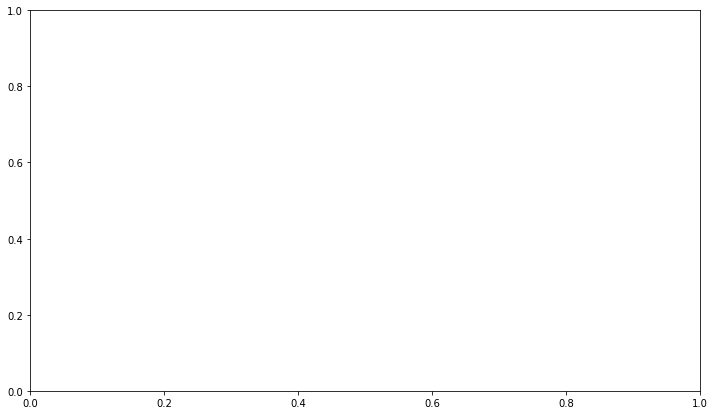

In [18]:
axis_x = [i for i in range(1, epochs + 1)]


plt.figure(figsize = (12,7))

plt.plot(axis_x, train_loss_list, label='Training Loss')
plt.plot(axis_x, eval_loss_list, label='Validation Loss')


font1 = {'family':'serif','color':'blue','size':20}
font2 = {'family':'serif','color':'darkred','size':15}

plt.title("Training and Validation Loss per Epoch", fontdict = font1)
plt.xlabel("Epochs", fontdict = font2)
plt.ylabel("Loss", fontdict = font2)

plt.legend()

plt.show()

# Evaluation

In [19]:
y_pred = []
y_true = []

# model = MLP()
# model.load_state_dict(torch.load('saved_model.pth', map_location=torch.device('cpu')))

model.eval()
for data, labels in test_loader:
    
    data = data.type(torch.float32)
    labels = labels.type(torch.long)
    
    output = model(data)

    output = (torch.max(torch.exp(output), 1)[1])
    y_pred.extend(output)
        
    labels = labels
    y_true.extend(labels)

<AxesSubplot:>

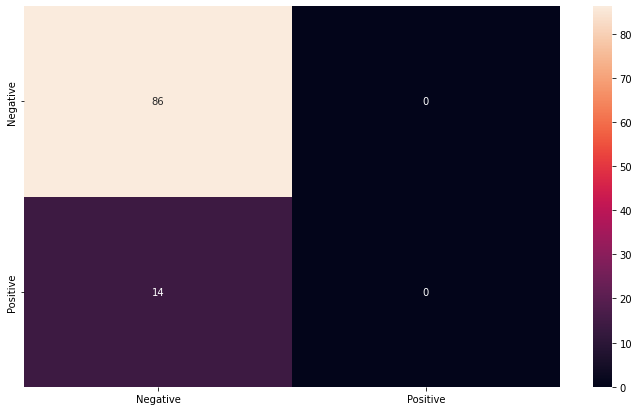

In [20]:
classes = ('Negative', 'Positive')

cf_matrix = torch.zeros(2, 2)
for i in range(len(y_pred)):
    cf_matrix[y_true[i]][y_pred[i]] += 1
cf_matrix = cf_matrix.numpy()
df_cm = pd.DataFrame(cf_matrix/np.sum(cf_matrix) * 100, index = [i for i in classes], columns = [i for i in classes])
plt.figure(figsize = (12,7))
sn.heatmap(df_cm, annot=True)
# plt.savefig('output.png')

In [21]:
correct_predictions = 0
for i in range(2):
    correct_predictions += cf_matrix[i][i]

print(f'Accuracy on raw test data: {round(correct_predictions / len(y_pred) * 100, 4)}%')

Accuracy on raw test data: 86.1873%
